Code for markov models 

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from hmmlearn import hmm 





Simple markov model for generating sequences of letters. *Control the initialization situation and you can expand the number of motifs*

In [277]:

initialization = np.array([1/3,1/3,1/3])
#'Motif A'
transmat1 = np.array([[.9,.05,0.05],[.99,.005,0.005],[.99,0.005,0.005]])
#'Motif B'
transmat2 = np.array([[0.005,.99,0.005],[.05,.9,0.05],[.005,0.99,0.005]])
#'Motif C'
transmat3 = np.array([[0.005,.005,.99],[0.005,.005,.99],[.05,0.05,0.9]])

#'Motif 'AB'
transmat4 = np.array([[0.05,.9,0.05],[.9,.05,0.05],[0.495,0.495,0.01]])
#'Motif 'AC'
transmat5 = np.array([[0.05,.05,0.9],[.495,.01,0.495],[.9,0.05,0.05]])
#'Motif 'BC'
transmat6 = np.array([[0.01,.495,.495],[0.05,.05,.9],[.05,0.9,0.05]])


#'Motif 'ABC'
transmat7 = np.array([[0.05,.9,0.05],[.05,.05,0.9],[0.9,0.05,0.05]])
#'Motif 'ACB'
transmat8 = np.array([[0.05,.05,0.9],[.9,.05,0.05],[.05,0.9,0.05]])


def returnsequence(init,transmat,length):
    model = hmm.MultinomialHMM(n_components=3)
    model.startprob_ = init;
    model.transmat_ = transmat;
    model.emissionprob_ = np.array([[1,0,0],[0,1,0],[0,0,1]]);
    [X,Z] = model.sample(length);
    Letters = np.array([]);
    for i in range(0,len(X)):
        if X[i] == 0:
            Letters = np.append(Letters,'A')
        elif X[i] == 1:
            Letters = np.append(Letters,'B')
        else: 
            Letters = np.append(Letters,'C')
    return Letters
            
            
returnsequence(initialization,transmat8,20)        

x = np.array(['Random','AB','BC'])
x[1][1].lower()

'b'

In [247]:
initialization = np.array([1/3,1/3,1/3])
transmat1 = np.array([[.8,.1,.1],[.1,0.4,0.5],[0,0.5,0.5]])
means = np.array([[5,  18,0.0],
                  [0, 0,0.0],
                  [10, 0, 0]])
covars = np.array([[[.9,0,0],[0,.05,0],[0,0,0.05]],[[0.05,0,0],[0,.9,0],[0,0,0.05]],[[0.05,0,0],[0,0.05,0],[0,0,.9]]])

model = hmm.GaussianHMM(n_components=3,covariance_type="full")
model.startprob_ = initialization
model.transmat_=transmat1
model.means_ = means
model.covars_ = covars


[X,Z] = model.sample(20)

Plotting

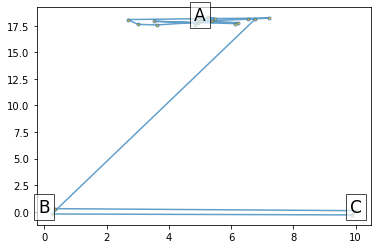

In [159]:
# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)


for i, m in enumerate(means):
    if i == 0:
        name = 'A'
    elif i == 1:
        name = 'B'
    else:
        name = 'C'
    plt.text(m[0], m[1], name,
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
